## Football Analysis Notebook:
An project to explore and analyse a set of all men's senior international football results from 1872 up to 2024.
<br>
Data taken from https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017/data

In [71]:
# Import libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Load dataframes
goalscorers = pd.read_csv('goalscorers.csv')
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [17]:
# exploratory analysis
gRow, gCol = goalscorers.shape
rRow, rCol = results.shape
sRow, sCol = shootouts.shape
print(f"the goalscorers dataframe has {gRow} rows and {gCol} columns")
print(f"The goalscores dataframe column names are:\n",list(goalscorers))
print(f"\nthe results dataframe has {rRow} rows and {rCol} columns")
print(f"The results dataframe column names are:\n",list(results))
print(f"\nthe shootouts dataframe has {sRow} rows and {sCol} columns")
print(f"The shootouts dataframe column names are:\n",list(shootouts))

the goalscorers dataframe has 44362 rows and 8 columns
The goalscores dataframe column names are:
 ['date', 'home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']

the results dataframe has 47598 rows and 9 columns
The results dataframe column names are:
 ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']

the shootouts dataframe has 645 rows and 5 columns
The shootouts dataframe column names are:
 ['date', 'home_team', 'away_team', 'winner', 'first_shooter']


# First analysis
Firstly, I would like to visualise how the average number of goals scored per game has changed over time.
<br>I will use the results dataframe to find the average number of goals scored per game for each year, and plot this data

We should consider that for years with few games played, this information will not be particularly informative. We should check if there are years with very few games played and exclude these from our analysis

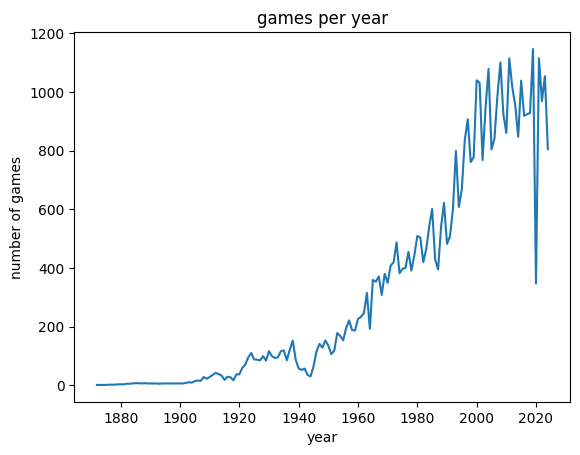

In [106]:
years = range(1872, 2025)

# create a new column in our dataframe with the year the game took place
def year_from_date (date):
    date = pd.to_datetime(date)
    return date.dt.year
results['year'] = year_from_date(results['date'])

early_years_games = [results['year'].value_counts()[i] for i in years]

# create plot of years against number of games played in that year
plt.figure()
plt.title('games per year')
plt.xlabel('year')
plt.ylabel('number of games')
plt.plot(years, early_years_games)
plt.show()

For the analysis to be useful, there needs to be a good number of games played in the years we are analysing. I would like to only consider years where at least 100 games were played. I would like the data to begin from the earliest year where all future years have at least 100 games played.<br>
This threshold can be altered by changing the variable in the below code block

In [105]:
threshold = 100
start_year = 2024
while results['year'].value_counts()[start_year] >= threshold:
    start_year -= 1
start_year += 1

print(f'The most recent year with fewer than {threshold} games played was {start_year -1}.')

new_results = results[results['year'] >= start_year]


The most recent year with fewer than 100 games played was 1945.


Now we have restricted our dataframe to years with a good sample size, we can create a plot of the average number of goals scored per game by year

In [79]:
# create new column in results dataframe, total_goals
new_results['total_goals'] = new_results['home_score'] + new_results['away_score']

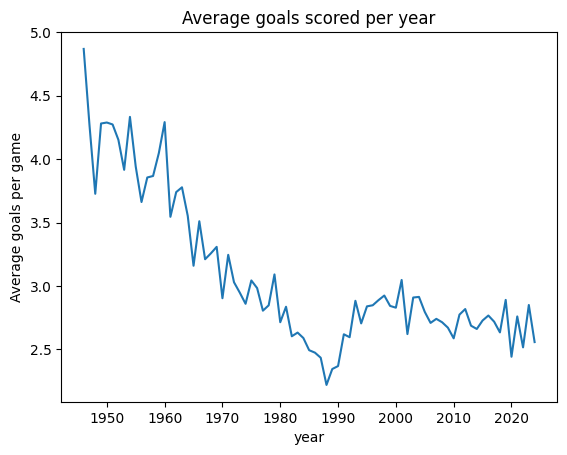

In [107]:
# group matches together by year, and calculate the average number fo goals per match by year

avg_goals_per_year = new_results.groupby('year')['total_goals'].mean()

plt.figure()
avg_goals_per_year.plot(kind='line')
plt.title('Average goals scored per year')
plt.xlabel('year')
plt.ylabel('Average goals per game')
plt.show()